In [26]:
import numpy as np 
import scipy as sp 
import scipy.sparse as spsp 
import scipy.sparse.linalg as spsplin

## Partie 1. (GMRES)

1. 

In [27]:
def Arnoldi (A, V, H) :
    n, p = V.shape
    w_p = A @ V[:, p-1]
    h = np.zeros(p+1)

    for j in range(p):
        h[j] = np.dot(V[:, j], w_p)
        w_p -= h[j] * V[:, j]

    h[p] = np.linalg.norm(w_p)

    v_p = w_p / h[p]

    V_p = np.zeros((n, p+1))
    H_p = np.zeros((p+1, p))

    V_p[:, :p] = V
    V_p[:, p] = v_p

    H_p[:p, :p-1] = H[:, :p-1]
    H_p[:p+1, p-1] = h

    return V_p, H_p

2. 

In [28]:
def gmres(A, b, xexact, max_iter=100, tol=1e-6):
    n = len(b)
    x0 = np.zeros(n)
    r0 = b - A @ x0
    beta = np.linalg.norm(r0)
    v0 = r0 / beta
    V = v0.reshape(-1, 1)
    H = np.zeros((1, 0))

    errors = []
    residuals = []

    for k in range(max_iter):
        V, H = Arnoldi(A, V, H)
        m = H.shape[0]
        e = np.zeros(m)
        e[0] = beta
        Q, R = np.linalg.qr(H)
        y = np.linalg.solve(R, Q.T @ e)
        xk = x0 + V[:, :-1] @ y
        error = np.linalg.norm(xexact - xk) / np.linalg.norm(xexact)
        rk = b - A @ xk
        residual = np.linalg.norm(rk) / np.linalg.norm(r0)

        errors.append(error)
        residuals.append(residual)

        if residual < tol:
            print(f"GMRES converged at iteration {k+1}")
            break

    return xk, errors, residuals

3. 

In [32]:
n = 1000
A = np.diag(2 * np.ones(n)) + 0.5 * np.random.rand(n, n) / np.sqrt(n)
b = np.random.rand(n)

xexact = np.linalg.solve(A, b)

xk, errors, residuals = gmres(A, b, xexact)

GMRES converged at iteration 6


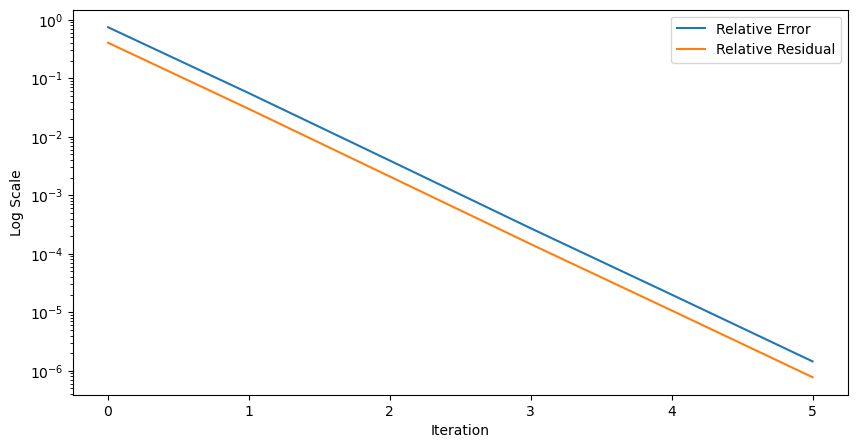

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.semilogy(errors, label='Relative Error')
plt.semilogy(residuals, label='Relative Residual')
plt.xlabel('Iteration')
plt.ylabel('Log Scale')
plt.legend()
plt.show()

4. 

In [ ]:
def gmres_restart(A, b, xexact, restart=10, max_iter=100, tol=1e-6):
    n = len(b)
    x0 = np.zeros(n)
    errors = []
    residuals = []
    total_iter = 0

    r0 = b - A @ x0
    beta = np.linalg.norm(r0)
    residual = beta / np.linalg.norm(b)
    residuals.append(residual)
    error = np.linalg.norm(xexact - x0) / np.linalg.norm(xexact)
    errors.append(error)

    while residual > tol and total_iter < max_iter:
        V = (r0 / beta).reshape(-1, 1)
        H = np.zeros((1, 0))

        for k in range(restart):
            V, H = Arnoldi(A, V, H)
            m = H.shape[0]
            e = np.zeros(m)
            e[0] = beta
            


    return xk, errors, residuals

## Partie 2. (Gradient Conjugué) 

5. 

6. 

## Partie 3. (Préconditionnement)

7. 

8. 

9. 

10. 